# Python Data Mining Quick Start Guide
## Ch 6 - Prediction with Regression and Classification
### Copyright: Nathan Greeneltch, PhD 2019

#### These code examples and description are meant to accompany the book "Python Data Mining Quick Start Guide" by Nathan Greeneltch. For full background on the topics and introduction sections, please purchase the book. 

This chapter is a heavily conceptual one. The conceptual descriptions are not copied to the notebook, only the code.

In [1]:
# initial imports
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")

# Regression

## Regression Example Dataset

In [2]:
# import modules
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# function to get boston dataset with training and test sets
def get_boston():
    # load the boston dataset
    dataset = load_boston()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['MEDV'] = dataset.target
    df.index.name = 'record'
           
    # split into training and test sets
    X_train, X_test, y_train, y_test = \
        train_test_split(df.loc[:, df.columns != 'MEDV'], 
                         df['MEDV'], test_size=.33, random_state=42)

    return [X_train, X_test, y_train, y_test]


## Linear Regression

In [3]:
### Linear Regression ###
# import modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# get moon dataset
X_train, X_test, y_train, y_test = get_boston()

# instantiate regression object and fit to training data
clf = LinearRegression()
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred) 
print('r2 score is = ' + str(r2))

r2 score is = 0.7261570836552478


## Regularizaton Penalties

In [4]:
### Lasso Regression ###
# import modules
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# get moon dataset
X_train, X_test, y_train, y_test = get_boston()

# instantiate classifier object and fit to training data
clf = Lasso(alpha=0.3)
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred) 
print('r2 score is = ' + str(r2))

r2 score is = 0.7050894840749293


In [5]:
### Ridge Regression ###
# import modules
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# get moon dataset
X_train, X_test, y_train, y_test = get_boston()

# instantiate classifier object and fit to training data
clf = Ridge(alpha=0.3)
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred) 
print('r2 score is = ' + str(r2))

r2 score is = 0.7241938555718037


# Classification

## Studying Classifier Examples to Build Intuition

The rest of this chapter will cover some common methods used for prediction. Below is a group of plots comparing different classification methods and how they predict labels for data:

TIP: Execute the next cell. Then take a minute to study the "Comparing Classification Methods" figure and look for any qualitative trends or patterns before reading the following sections. Your goal should be to read the rest of the chapter looking for validation of your qualitative pattern recognition. Trust me, if you take this approach you will gain intuition quickly.

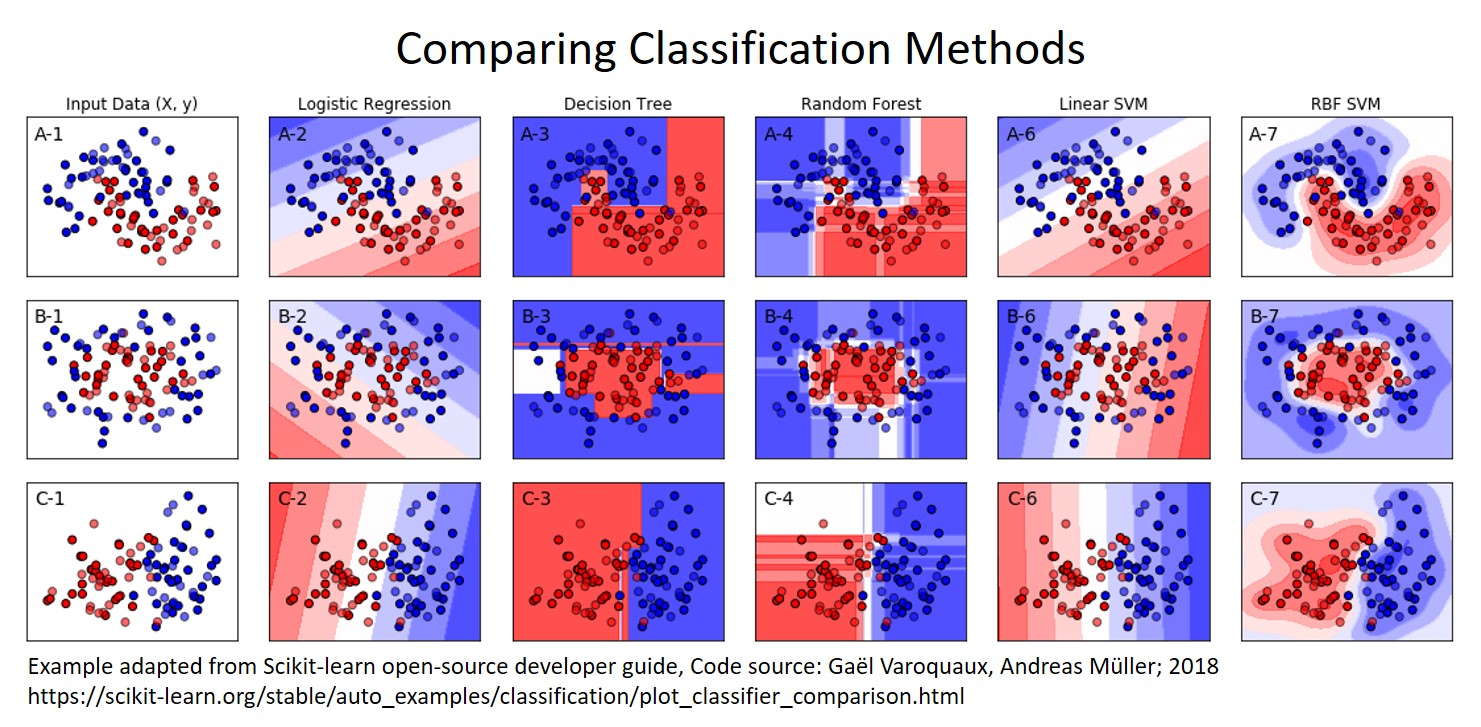

In [30]:
# execute this cell to show the image
from IPython.display import Image
Image("./images/compare_prediction_methods.jpg")

## Classification Example Dataset

In [6]:
# import modules
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# function to get toy moon dataset with training and test sets
def get_moon_data():
    # make blobs and split into train and test sets
    X, y = make_moons(n_samples=150, noise=0.4, random_state=42)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.33, random_state=42)
    
    return [X_train, X_test, y_train, y_test]

## Logistic Regression

In [7]:
### Logistic Regressiin ###
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# get moon dataset
X_train, X_test, y_train, y_test = get_moon_data()

# instantiate classifier object and fit to training data
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.7499999999999999


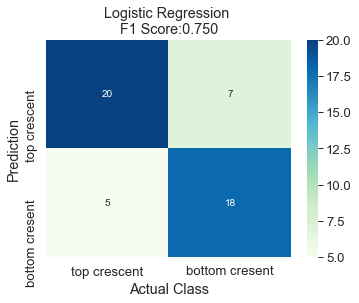

In [10]:
### plot confusion matrix ###
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Creates a confusion matrix
cm = confusion_matrix(y_pred, y_test) 

# create df and add class names
labels = ['top crescent', 'bottom cresent']
df_cm = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)

# plot figure
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, cmap="GnBu", annot=True)

#add titles and labels for the axes
plt.title('Logistic Regression \nF1 Score:{0:.3f}'.format(f1_score(y_test, y_pred)))
plt.ylabel('Prediction')
plt.xlabel('Actual Class')
plt.show()

### Regularized Logistic Regression

In [8]:
### Regularized Logistic Regression ###
clf = LogisticRegression(solver='lbfgs', penalty='l2', C=0.5)

## Support Vector Machines

In [9]:
### SVM Classification ###
# import modules
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# get moon dataset
X_train, X_test, y_train, y_test = get_moon_data()

# instantiate classifier object and fit to training data
clf = SVC(kernel="linear", C=0.5)
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.7499999999999999


### Support Vector Machine with Gaussian Kernel

In [10]:
### SVM with Gaussian Kernel Classification ###
# instantiate classifier object and fit to training data
clf = SVC(gamma=2, C=1)
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.782608695652174


## Tree-based methods

### Decision Trees

In [13]:
### Decision Tree Classification ###
# import modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# get moon dataset
X_train, X_test, y_train, y_test = get_moon_data()

# instantiate classifier object and fit to training data
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.7391304347826089


### Random Forest

In [15]:
### Random Forest Classification ###
# import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# get moon dataset
X_train, X_test, y_train, y_test = get_moon_data()

# instantiate classifier object and fit to training data
clf = RandomForestClassifier(max_depth=4, n_estimators=4, 
                             max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# predict on test set and score the predictions against y_test
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred) 
print('f1 score is = ' + str(f1))

f1 score is = 0.7755102040816326


#### Using OOB Score for Validation of Random Forrest Model

In [22]:
### Use OOB for Validation Set ###
# instantiate classifier object and fit to training data
clf = RandomForestClassifier(max_depth=4, n_estimators=10, 
                             max_features='sqrt', random_state=42,
                             oob_score=True)
clf.fit(X_train, y_train)

# predict on test set and score the predictions with OOB
oob_score = clf.oob_score_
print('OOB score is = ' + str(oob_score))

OOB score is = 0.73


## Cross-validation

### Create Validation Set

In [23]:
### Cross Validation ###
# load iris and create X and y
from sklearn.datasets import load_iris
dataset = load_iris()
X,y = dataset.data, dataset.target

# import module
from sklearn.model_selection import train_test_split

# create train and test sets
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.33)

# create validation set from training set
X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=.33)

### k-fold Cross-validation

In [24]:
### k-fold Cross Validation ###
# load iris and create X and y
from sklearn.datasets import load_iris
dataset = load_iris()
X,y = dataset.data, dataset.target

# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

# create train and test sets
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.33)

# instantiate classifier object and pass to cross_val_score function
clf = LogisticRegression(solver='lbfgs', multi_class='ovr')
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print(scores)

[0.9280303  0.92207792 0.88854489 0.95848596]


### Grid Search for Hyperparamter Tuning

In [28]:
### Grid Search with k-fold Cross-validation ###
# load iris and create X and y
from sklearn.datasets import load_iris
dataset = load_iris()
X,y = dataset.data, dataset.target

# import modules
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split

# create train and test sets
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.33)

# instantiate svc and gridsearch object and fit 
parameters = {'kernel':[]'linear', 'rbf'], 'C':[1, 5, 10]}
svc = SVC(gamma='auto')
clf = GridSearchCV(svc, parameters, cv=5, scoring='f1_macro')
clf.fit(X_train, y_train)

# print best scoring classifier
print('Best score is = ' + str(clf.best_score_))
print('Best parameters are = ' + str(clf.best_params_))

Best score is = 0.9702253302253303
Best parameters are = {'C': 5, 'kernel': 'rbf'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
# use the resulting classifier to predict on new data
y_pred = clf.predict(X_test)